In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('YoY data.csv')
df

,PARTNER,TIME,INDIC_ET,SITC06,GEO,Value,Flag and Footnotes
0,Russia,2002,Trade balance in million ECU/EURO,"Mineral fuels, lubricants and related materials",European Union - 27 countries (from 2020),"-37,566.8",NaN
1,Russia,2002,Exports in million of ECU/EURO,"Mineral fuels, lubricants and related materials",European Union - 27 countries (from 2020),182.0,NaN
2,Russia,2002,Imports in million of ECU/EURO,"Mineral fuels, lubricants and related materials",European Union - 27 countries (from 2020),"37,748.8",NaN
3,Russia,2002,Share of imports by partner (%),"Mineral fuels, lubricants and related materials",European Union - 27 countries (from 2020),24.8,NaN
4,Russia,2002,Share of exports by partner (%),"Mineral fuels, lubricants and related materials",European Union - 27 countries (from 2020),0.8,NaN
...,...,...,...,...,...,...,...
90,Russia,2020,Trade balance in million ECU/EURO,"Mineral fuels, lubricants and related materials",European Union - 27 countries (from 2020),"-59,228.4",NaN
91,Russia,2020,Exports in million of ECU/EURO,"Mineral fuels, lubricants and related materials",European Union - 27 countries (from 2020),588.0,NaN
92,Russia,2020,Imports in million of ECU/EURO,"Mineral fuels, lubricants and related materials",European Union - 27 countries (from 2020),"59,816.4",NaN
93,Russia,2020,Share of imports by partner (%),"Mineral fuels, lubricants and related materials",European Union - 27 countries (from 2020),27.0,NaN


In [3]:
df = df[['TIME', 'INDIC_ET', 'Value']]

In [4]:
df.index = df['INDIC_ET']

In [5]:
df2 = pd.DataFrame()

In [6]:
time = []
value = []

for i in range(len(df.index.values)):
    if str(df.index.values[i]) == 'Share of imports by partner (%)':
        time.append(df['TIME'].values[i]), value.append(df['Value'].values[i])

In [9]:
value

['24.8',
 '25.9',
 '26.4',
 '27.0',
 '27.1',
 '27.5',
 '26.8',
 '29.5',
 '31.6',
 '31.0',
 '29.9',
 '32.1',
 '30.7',
 '27.9',
 '29.5',
 '29.3',
 '28.0',
 '27.4',
 '27.0']

In [10]:
df2 = pd.DataFrame([time, value])

In [14]:
df2 = df2.transpose()

In [15]:
df2.columns = ['Year', '% EU imports from Russia']

In [16]:
df2

,Year,% EU imports from Russia
0,2002,24.8
1,2003,25.9
2,2004,26.4
3,2005,27.0
4,2006,27.1
5,2007,27.5
6,2008,26.8
7,2009,29.5
8,2010,31.6
9,2011,31.0


In [30]:
for i in range(len(df2.index.values)):
    df2['% EU imports from Russia'].values[i] = float(df2['% EU imports from Russia'].values[i])
    df2['Year'].values[i] = str(df2['Year'].values[i])

In [31]:
df2

,Year,% EU imports from Russia
0,2002,24.8
1,2003,25.9
2,2004,26.4
3,2005,27
4,2006,27.1
5,2007,27.5
6,2008,26.8
7,2009,29.5
8,2010,31.6
9,2011,31


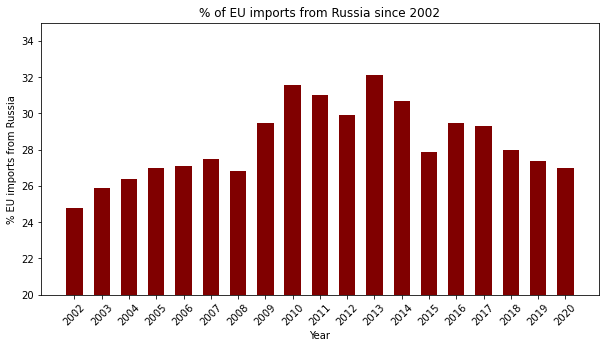

In [64]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)

plt.bar(df2['Year'], df2['% EU imports from Russia'], color ='maroon', width = 0.6)
 
plt.xlabel("Year")
plt.xticks(rotation = 45)
plt.ylim(20, 35)
plt.ylabel('% EU imports from Russia')
plt.title("% of EU imports from Russia since 2002")
plt.savefig('EU-Russia.png', dpi = 700)
plt.show()

In [54]:
value2 = []

for i in range(len(df.index.values)):
    if str(df.index.values[i]) == 'Trade balance in million ECU/EURO':
        value2.append(float(df['Value'].values[i].replace(',', '')))

In [55]:
value2

[-37566.8,
 -41458.9,
 -47600.0,
 -71955.1,
 -90912.2,
 -92196.5,
 -119263.9,
 -85048.7,
 -117206.4,
 -146944.0,
 -155742.6,
 -153511.9,
 -130129.7,
 -87211.2,
 -74681.6,
 -92879.0,
 -108936.3,
 -99013.9,
 -59228.4]

In [56]:
df2['Trade Balance'] = value2 

In [57]:
df2

,Year,% EU imports from Russia,Trade Balance
0,2002,24.8,-37566.8
1,2003,25.9,-41458.9
2,2004,26.4,-47600.0
3,2005,27,-71955.1
4,2006,27.1,-90912.2
5,2007,27.5,-92196.5
6,2008,26.8,-119263.9
7,2009,29.5,-85048.7
8,2010,31.6,-117206.4
9,2011,31,-146944.0


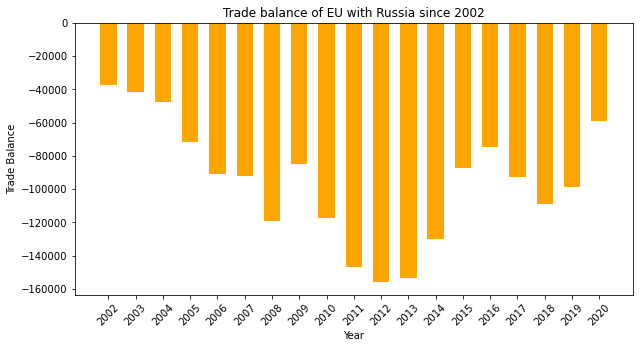

In [65]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)

plt.bar(df2['Year'], df2['Trade Balance'], color = 'orange', width = 0.6)

plt.xlabel('Year')
plt.ylabel('Trade Balance')
plt.title('Trade balance of EU with Russia since 2002')
plt.xticks(rotation = 45)
plt.savefig('Trade balance.png', dpi = 700)
plt.show()